In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import time
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data_concelhos.csv')

In [4]:
df = df.fillna(0)
df1 = df1.fillna(0)

In [5]:
df = pd.DataFrame([df['data'], df['confirmados'], df['recuperados'], df['obitos'], df['suspeitos'], df['ativos']])

In [6]:
df = df.T

In [7]:
df.head()

,data,confirmados,recuperados,obitos,suspeitos,ativos
0,26-02-2020,0,0,0,25,0
1,27-02-2020,0,0,0,51,0
2,28-02-2020,0,0,0,59,0
3,29-02-2020,0,0,0,70,0
4,01-03-2020,0,0,0,85,0


In [8]:
df1 =pd.DataFrame([df1['data'],df1['PÓVOA DE VARZIM'],df1['VILA DO CONDE'],df1['MATOSINHOS'],df1['PORTO'],df1['VILA NOVA DE GAIA'], df1['GONDOMAR'],df1['MAIA'],df1['TROFA'],df1['SANTO TIRSO'],df1['VALONGO'],df1['PAÇOS DE FERREIRA'],df1['PAREDES'],df1['LOUSADA'],df1['PENAFIEL'],df1['FELGUEIRAS'],df1['AMARANTE'], df1['MARCO DE CANAVESES'],df1['BAIÃO']])

In [9]:
df1=df1.T

In [10]:
df1.head()

,data,PÓVOA DE VARZIM,VILA DO CONDE,MATOSINHOS,PORTO,VILA NOVA DE GAIA,GONDOMAR,MAIA,TROFA,SANTO TIRSO,VALONGO,PAÇOS DE FERREIRA,PAREDES,LOUSADA,PENAFIEL,FELGUEIRAS,AMARANTE,MARCO DE CANAVESES,BAIÃO
0,24-03-2020,0,8,54,126,68,56,104,0,7,65,5,7,29,6,17,0,3,0
1,25-03-2020,0,8,56,137,83,62,119,0,8,71,10,8,27,7,17,0,4,0
2,26-03-2020,13,12,81,259,163,114,157,8,13,100,19,16,33,11,24,0,0,0
3,27-03-2020,15,15,107,317,262,149,171,8,20,108,22,18,38,11,26,3,0,0
4,28-03-2020,15,22,189,343,262,153,219,14,24,139,22,21,38,13,26,4,9,0


In [11]:
df2 = df.drop(['data'], axis=1)

# HeatMap

In [12]:
XfeaturesArray=zip(df2['confirmados'], df2['recuperados'], df2['obitos'], df2['suspeitos'], df2['ativos'])
Xfeatures=list(XfeaturesArray)
Y=df2['confirmados']

In [13]:
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X=standardizer.fit_transform(Xfeatures)

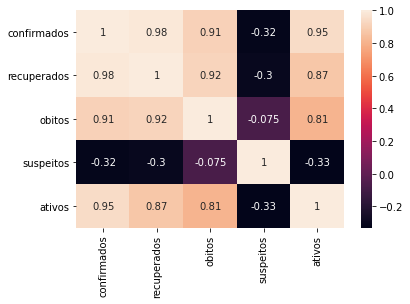

In [14]:
df2 = pd.DataFrame(X, columns=['confirmados','recuperados', 'obitos', 'suspeitos', 'ativos'])
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

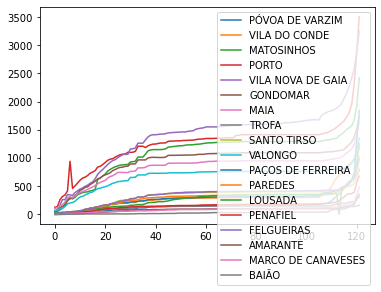

In [15]:
df1.plot()

In [16]:
cols = df.keys()
cols1 = df1.keys()

In [17]:
print(cols,cols1)

Index(['data', 'confirmados', 'recuperados', 'obitos', 'suspeitos', 'ativos'], dtype='object') Index(['data', 'PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'],
      dtype='object')


In [18]:
confirmed = df.loc[:, cols[1]]
deaths = df.loc[:, cols[3]]
recoveries = df.loc[:, cols[2]]

In [19]:
cols1

Index(['data', 'PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'],
      dtype='object')

# PieChart dos casos confirmados nos concelhos do Porto

In [20]:
Z = df1.loc[121,cols1[1]:cols1[-1]]

In [21]:
casos_Porto = Z.sum()

In [22]:
casos_Porto

23815.0

In [23]:
percent_list=[]

In [24]:
for row in Z:
#    s = print((row*100)/casos_Porto)
    percent_list.append((row*100)/casos_Porto)

In [25]:
print(percent_list)

[3.2668486248162925, 4.996850724333403, 10.186857022884736, 14.730212051228218, 13.630065085030443, 7.306319546504304, 6.920008398068444, 1.31009867730422, 3.451606130589964, 5.677094268318287, 7.747218139827839, 4.333403317237035, 5.261389880327525, 2.859542305269788, 4.1066554692420745, 1.5032542515221499, 2.0365315977325213, 0.6760445097627545]


In [26]:
percent_list = [3.2668486248162925, 4.996850724333403, 10.186857022884736, 14.730212051228218, 13.630065085030443, 7.306319546504304, 6.920008398068444, 1.31009867730422, 3.451606130589964, 5.677094268318287, 7.747218139827839, 4.333403317237035, 5.261389880327525, 2.859542305269788, 4.1066554692420745, 1.5032542515221499, 2.0365315977325213, 0.6760445097627545]

rounded_perc = [round(num, 1) for num in percent_list]

([<matplotlib.patches.Wedge at 0x7fbfcf786790>,
 [Text(3.8197941160372486, 0.3934118847813519, 'PÓVOA DE VARZIM'),
  Text(3.5908007602489405, 1.3607901749335316, 'VILA DO CONDE'),
  Text(2.5651921294482283, 2.85751453872362, 'MATOSINHOS'),
  Text(-0.19671269104136554, 3.834958163680963, 'PORTO'),
  Text(-3.106030039443627, 2.2579143903332164, 'VILA NOVA DE GAIA'),
  Text(-3.8383682277999878, -0.11193456935005959, 'GONDOMAR'),
  Text(-3.4129729774825144, -1.7598907508632855, 'MAIA'),
  Text(-2.8495479436003177, -2.5740389501954315, 'TROFA'),
  Text(-2.4340988888702326, -2.969976868462227, 'SANTO TIRSO'),
  Text(-1.4945630033075619, -3.537213794661595, 'VALONGO'),
  Text(0.08433653054126487, -3.8390737619400155, 'PAÇOS DE FERREIRA'),
  Text(1.5006288488339246, -3.5346446862516987, 'PAREDES'),
  Text(2.4823545617995855, -2.9297637839103663, 'LOUSADA'),
  Text(3.1413825385740144, -2.2084645675994627, 'PENAFIEL'),
  Text(3.5459264918940936, -1.4737724770410268, 'FELGUEIRAS'),
  Text(3.74939

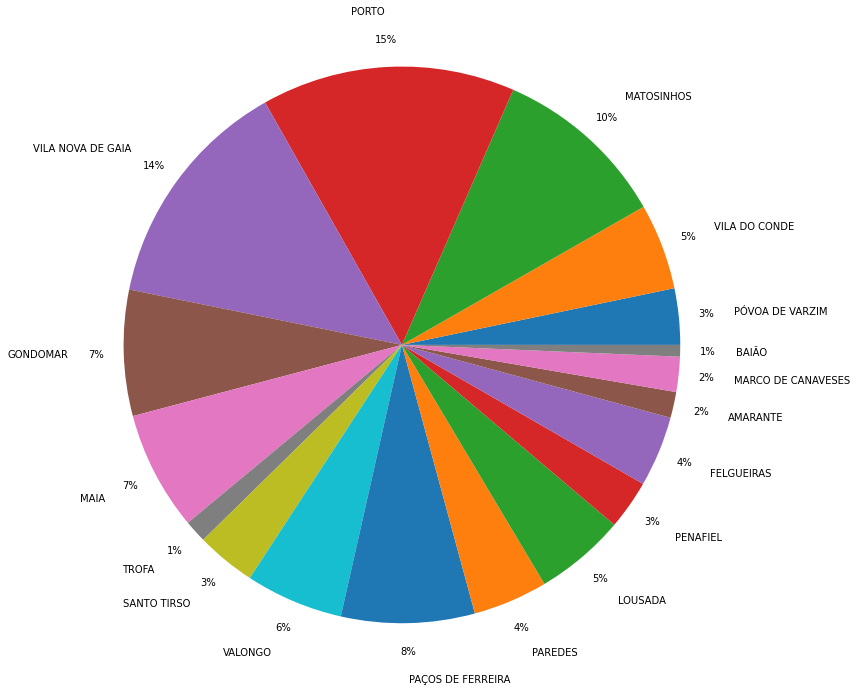

In [27]:
plt.pie(percent_list, labels=['PÓVOA DE VARZIM', 'VILA DO CONDE', 'MATOSINHOS', 'PORTO',
       'VILA NOVA DE GAIA', 'GONDOMAR', 'MAIA', 'TROFA', 'SANTO TIRSO',
       'VALONGO', 'PAÇOS DE FERREIRA', 'PAREDES', 'LOUSADA', 'PENAFIEL',
       'FELGUEIRAS', 'AMARANTE', 'MARCO DE CANAVESES', 'BAIÃO'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=3.2)

# Regressão Linear

In [28]:
confirmed = df.loc[:, cols[1]]
deaths = df.loc[:, cols[3]]

In [29]:
confirmed

0           0
1           0
2           0
3           0
4           0
        ...  
269    255970
270    260758
271    264802
272    268721
273    274011
Name: confirmados, Length: 274, dtype: object

In [30]:
deaths

0         0
1         0
2         0
3         0
4         0
       ... 
269    3824
270    3897
271    3971
272    4056
273    4127
Name: obitos, Length: 274, dtype: object

In [31]:
for i in df.loc[:, cols[1]]:
    confirmed_sum = df.loc[:,cols[1]][i].sum()

AttributeError: 'int' object has no attribute 'sum'

In [41]:
del X[cols[2]]

In [43]:
X1= X

In [44]:
X=np.array(df.drop("confirmados",1))
y=np.array(df["confirmados"])
clf=LinearRegression()
clf.fit(g,y)


ValueError: could not convert string to float: '26-02-2020'

In [35]:
import sklearn as sk

In [36]:
%whos

Variable           Type                Data/Info
------------------------------------------------
LinearRegression   ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
SimpleImputer      type                <class 'sklearn.impute._base.SimpleImputer'>
StandardScaler     type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                  DataFrame               confirmados recuperad<...>n\n[274 rows x 3 columns]
X1                 method              <bound method NDFrame.cop<...>\n[274 rows x 3 columns]>
Xfeatures          list                n=274
XfeaturesArray     zip                 <zip object at 0x7fbfcefd4bc0>
Y                  Series              0           0\n1         <...>ength: 274, dtype: object
Z                  Series              PÓVOA DE VARZIM        77<...>nName: 121, dtype: object
casos_Porto        float               23815.0
clf                LinearRegression    LinearRegression()
cols               Index    

In [ ]:
for row in confirmed:
    CONFIRMED_SUM = confired.iloc[:, cols[0]:cols[1]